In [1]:
from __future__ import division
from math import log, exp, tan, atan, pi, ceil
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time
import scipy.spatial as spatial

import glob
from termcolor import colored
import re
import scipy.io as sio
from scipy.interpolate import InterpolatedUnivariateSpline
import shdom
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid

%matplotlib notebook

In [5]:
import collections

FILE_TO_ANALYZE  = '../vadim/Memory_usage_tests/new_121_toanalyze.txt'

# FILE_TO_ANALYZE  = '../vadim/Memory_usage_tests/toanalyze121.txt'
if os.path.exists(FILE_TO_ANALYZE):
    # Open a file
    f = open(FILE_TO_ANALYZE, "r")
    scat_lines = f.readlines()
    # Close opend file
    f.close()
    LIST_LENGTH = len(scat_lines)

num_mu_list = [16,8,4]
num_phi_list = [32,16,8]

ANGULAR_RES = [a*b for a,b in zip(num_mu_list,num_phi_list)]

start_from_index = 5
end_index = start_from_index + 1
IFSHOW = False


# order: d_nstf, d_agf, d_ANGULAR, d_data.

# NSHF_LIST = [5,    4.28,    3.57,    2.86,   2.14,    1.43,    0.72,    0.01]
# AGF_LIST = [5,    4.44,    3.88,    3.32,    2.77,    2.21,    1.65,    1.10]

NSHF_LIST = [5,    4.28,    3.57,    2.86,   2.14,    1.43,    2,   0.72,   1.1,  1.5]
AGF_LIST = [5,    4.44,    3.88,    3.32,    2.77,    2.21,    1.65,    1.10]

d_nstf = collections.OrderedDict()
for num_sh_term_factor in NSHF_LIST:
    for high_order_radiance in [True]: # it is faster to use it True
        for del_source in [False]: # it is faster to use it False
            # max bm:
            for max_total_mb in [320000.0]:
                # adapt_grid_factor 
                d_agf = collections.OrderedDict()
                for adapt_grid_factor in AGF_LIST:
                    

                    fx_list = [21,31,61,81,101,121,152]
                    fy_list = [21,31,61,81,101,121,252]
                    fz_list = [21,31,61,67,67,67,67]

                    origin_list =  [[0.2, 0.2, 0.91],\
                                    [0.3, 0.3, 1.34333],\
                                    [0.6, 0.6, 2.64333],\
                            [0.8, 0.8, 2.9033],\
                            [1, 1, 2.90333],\
                            [1.2, 1.2, 2.90333],\
                            [1.5, 2.5, 2.90333]]

                    fov_list = [85.4187799, 105.4187799, 85.41877, 96.27356, \
                                108.59441, 118.08409, 147.86411]

                    lookat_list = [[0.21, 0.21, 0.56],\
                                   [0.31, 0.31, 0.826667],\
                                   [0.61, 0.61, 1.62667],\
                            [0.81, 0.81, 1.78667],\
                            [1.01, 1.01, 1.78667],\
                            [1.21, 1.21, 1.78667],\
                            [1.52, 2.52, 1.78667]]
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    fx_list = fx_list[start_from_index:end_index]
                    fy_list = fy_list[start_from_index:end_index]
                    fz_list = fz_list[start_from_index:end_index]
                    origin_list = origin_list[start_from_index:end_index]
                    fov_list = fov_list[start_from_index:end_index]
                    lookat_list = lookat_list[start_from_index:end_index]


                    # without railight:
                    
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    #start_from_index = 3
                    #end_index = 4

                    

                    for fx,fy,fz,origin,fov,lookat in zip(fx_list,fy_list,fz_list,origin_list,fov_list,lookat_list):
                        
                        d_ANGULAR = collections.OrderedDict()
                        for num_mu,num_phi in zip(num_mu_list,num_phi_list):
                            
                            

                            this_name = 'help_tamar_cvpr{}x{}x{}'.format(fx,fy,fz)
                            this_name = this_name + '_HOR' if high_order_radiance else this_name
                            this_name = this_name + '_DS' if del_source else this_name
                            this_name = this_name + '_ADF{}E-2'.format(int(100*adapt_grid_factor))
                            this_name = this_name + '_MTB{}'.format(int(1e-3*max_total_mb))
                            this_name = this_name + '_DS' if del_source else this_name
                            this_name = this_name + '_NSTF{}E-2'.format(int(100*num_sh_term_factor))
                            this_name = this_name + '_MU{}PHI{}'.format(num_mu,num_phi)
    
    
                            output_dir = '../vadim/experiments/{}/monochromatic'.format(this_name)
        
                            if os.path.exists(output_dir):
                                print(this_name)
                                S = '1'
                                # parsing part:
                                if os.path.exists(FILE_TO_ANALYZE):
                                    
                            
                                    for line_index, line in enumerate(scat_lines):
                                        if line.startswith("#"):
                                            continue
                                            
                                        S = '1'
                                        if("--{}x{}x{}--".format(fx,fy,fz) in line):
                                            srate_index = line_index
                                            S = S + '0'
                                            if("adapt_grid_factor = {}".format(adapt_grid_factor) in scat_lines[srate_index+3]):
#                                                 print("1",scat_lines[srate_index+3])
                                                S = S + '0'
                                            if("num_sh_term_factor = {}".format(num_sh_term_factor) in scat_lines[srate_index+6]):
#                                                 print("2",scat_lines[srate_index+6])
                                                S = S + '0'
                                            if("MU={}, PHI={}".format(num_mu,num_phi) in scat_lines[srate_index+7]):
#                                                 print("3",scat_lines[srate_index+7])
                                                S = S + '0'
                                            
                                            new_list = scat_lines[srate_index+8:min(LIST_LENGTH,srate_index+200)]
                                            #print(S)
                                            if(S == '10000'):
                                                SS = 0
                                                for in_line_index, in_line in enumerate(new_list):
#                                                     print(in_line)
                                                    if('--- the wantmem variable after REDUCE in Mib' in in_line):
                                                        g_wantmem = re.findall(
                                                            '--- the wantmem variable after REDUCE in Mib is  *(\d*.\d*)', in_line)[0]
                                                        assert g_wantmem in in_line, "Problem in g_wantmem line"  
                                                        g_wantmem = int(float(g_wantmem))
                                                        SS = SS + 1 
                                                        
                                                    if('Elapsed: ' in in_line):
                                                        g_time = re.findall(
                                                        'Elapsed: *(\d*.\d*)', in_line)[0]
                                                        assert g_time in in_line, "Problem in g_time line" 
                                                        g_time = shdom.float_round(float(g_time))
                                                        SS = SS + 1 
                                                        

                                                    if(" 404 " in in_line):
                                                        g_get_medium = re.findall('404 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_get_medium in in_line, "Problem in get_medium line"
                                                        g_get_medium = shdom.float_round(float(g_get_medium))
                                                        SS = SS + 1 
                                                        

                                                    if(" 405 " in in_line):
                                                        g_get_solver = re.findall('405 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_get_solver in in_line, "Problem in g_get_solver line"
                                                        g_get_solver = shdom.float_round(float(g_get_solver))
                                                        SS = SS + 1 
                                                        

                                                    if(" 406 " in in_line):
                                                        g_rte_solve = re.findall('406 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_rte_solve in in_line, "Problem in g_get_solver line"   
                                                        g_rte_solve = shdom.float_round(float(g_rte_solve))
                                                        SS = SS + 1 
                                                        

                                                    if(" 407 " in in_line):
                                                        g_render = re.findall('407 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_render in in_line, "Problem in g_get_solver line"
                                                        g_render = shdom.float_round(float(g_render))
                                                        SS = SS + 1 
                                                        

                                                
                                                        print("wantmem is {}\nRTESOLVE is {}\nTime is {}\nPer voxel is {}\n".format(
                                                            g_wantmem,g_rte_solve,g_time,(1e6*g_wantmem/(fx*fy*fz*1.048576))))
                                                    
                                                        # order: d_nstf, d_agf, d_ANGULAR, d_data.
                                                        d_data = collections.OrderedDict()
            
                                                        g_total = g_rte_solve + g_render + g_get_solver + g_get_medium
            
                                                        d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
                                                        d_data['profile'] = g_total/1.048576 # convert to Mbyte
                                                        d_data['time'] = g_time
                                                        d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
                                                        d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)

                                                        # calculate error:
                                                        # load the measurments to see the rendered images:
                                                        measurements = shdom.load_forward_model_measurements(output_dir)
                                                        # A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
                                                        USED_CAMERA = measurements.camera
                                                        RENCERED_IMAGES = measurements.images
                                                        original_image = RENCERED_IMAGES[0]
                                                        
                                                        epsilon = np.linalg.norm((original_image - gt_image), 2) / np.linalg.norm(gt_image,2)
#                                                         epsilon = np.linalg.norm((original_image - gt_image), 2)
                                                        d_data['error']=epsilon
                                                        d_ANGULAR[num_mu*num_phi] = d_data
        
                                                        break          
                                                                  
                                                
                                    
       
                                # load the measurments to see the rendered images:
                                measurements = shdom.load_forward_model_measurements(output_dir)
                                # A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
                                USED_CAMERA = measurements.camera
                                RENCERED_IMAGES = measurements.images
                                original_image = RENCERED_IMAGES[0]
                                if(IFSHOW):

                                    f, ax = plt.subplots(1, 1, figsize=(8, 8))
                                    ax.imshow(original_image,cmap='gray')
                                    ax.invert_xaxis() 
                                    ax.invert_yaxis() 
                                    ax.axis('off')
                                    ax.set_title(this_name)
               
                    d_agf[adapt_grid_factor] = d_ANGULAR
                

                
    d_nstf[num_sh_term_factor] = d_agf
    


help_tamar_cvpr121x121x67_HOR_ADF500E-2_MTB320_NSTF500E-2_MU16PHI32
wantmem is 80739
RTESOLVE is 72719.793
Time is 3382.849
Per voxel is 78494.26180244623

help_tamar_cvpr121x121x67_HOR_ADF500E-2_MTB320_NSTF500E-2_MU8PHI16
wantmem is 21163
RTESOLVE is 18534.562
Time is 833.653
Per voxel is 20574.61775009809

wantmem is 21163
RTESOLVE is 18534.797
Time is 832.795
Per voxel is 20574.61775009809

help_tamar_cvpr121x121x67_HOR_ADF500E-2_MTB320_NSTF500E-2_MU4PHI8
wantmem is 6187
RTESOLVE is 4907.496
Time is 270.283
Per voxel is 6014.986534038505

wantmem is 6187
RTESOLVE is 4907.434
Time is 265.795
Per voxel is 6014.986534038505

help_tamar_cvpr121x121x67_HOR_ADF444E-2_MTB320_NSTF500E-2_MU16PHI32
wantmem is 71696
RTESOLVE is 64559.84
Time is 3385.29
Per voxel is 69702.6789307297

help_tamar_cvpr121x121x67_HOR_ADF444E-2_MTB320_NSTF500E-2_MU8PHI16
wantmem is 18793
RTESOLVE is 16443.516
Time is 836.772
Per voxel is 18270.509444671992

help_tamar_cvpr121x121x67_HOR_ADF444E-2_MTB320_NSTF500E-2_M

Text(0.5, 1.0, 'help_tamar_cvpr121x121x67_HOR_ADF500E-2_MTB320_NSTF500E-2_MU16PHI32')

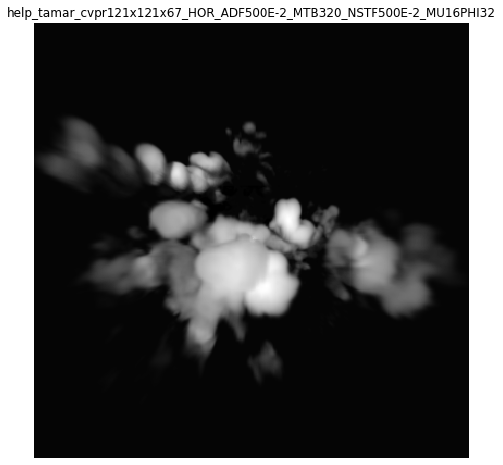

In [4]:
output_dir = '../vadim/experiments/help_tamar_cvpr121x121x67_HOR_ADF400E-2_MTB320_NSTF200E-2_MU32PHI64/monochromatic'
# load the measurments to see the rendered images:
measurements = shdom.load_forward_model_measurements(output_dir)
last_name = this_name
# A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
USED_CAMERA = measurements.camera
RENCERED_IMAGES = measurements.images
gt_image = RENCERED_IMAGES[0]

f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(gt_image,cmap='gray')
ax.invert_xaxis() 
ax.invert_yaxis() 
ax.axis('off')
ax.set_title(last_name)

    


5 5 512 139.369443515065 71357.15507971328 56.38081666666667
5 4.44 512 123.75714446355099 63363.657965338105 56.4215
5 3.88 512 108.15372620922884 55374.707819125164 55.75738333333334
5 3.32 512 92.54404753405107 47382.55233743415 56.12775
5 2.77 512 77.21692327968438 39535.0647191984 58.187400000000004
5 2.21 512 61.61831094746883 31548.57520510404 56.99185
5 1.65 512 46.00287124199816 23553.470075903057 56.14243333333333
5 1.1 512 30.659086710838366 15697.452395949244 34.67501666666667
4.28 5 512 119.72403589851417 61298.70638003926 61.3997
2 2.77 512 31.870860759313832 16317.880708768682 86.75388333333333
2 1.65 512 18.990858494807377 9723.319549341377 83.61545
2 1.1 512 12.651942177372767 6477.794394814857 51.48516666666667
0.72 2.77 512 12.521280339364312 6410.895533754528 77.8335
0.72 1.65 512 7.4474988064935586 3813.119388924702 66.81956666666666
5 5 128 145.92764165890677 18678.738132340066 13.879916666666666
5 4.44 128 129.57802756989173 16585.98752894614 13.946200000000001
5

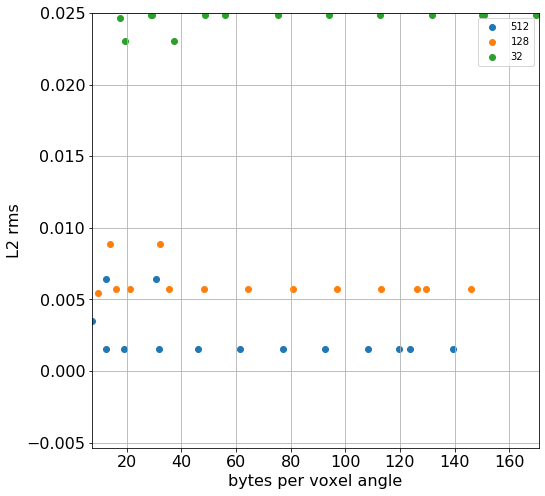

In [6]:
#  show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    for k_nstf in d_nstf.keys():

        d_agf = d_nstf[k_nstf]
        for k_agf in d_agf.keys():
            d_ANGULAR = d_agf[k_agf]


            if(k_angular in d_ANGULAR.keys()):
                
                d_data = d_ANGULAR[k_angular]
#                 if(k_angular == 512):
#                     print(d_data['error'])
                    
                print(k_nstf,k_agf,k_angular,1e6*d_data['per_voxel_angle'],1e6*d_data['per_voxel'],d_data['time']/60)

    #             x.append(1e6*d_data['per_voxel'])
                x.append(1e6*d_data['per_voxel_angle'])
    #             y.append(d_data['time']/60)
                y.append(d_data['error'])
        
    plt.scatter(x, y,label='{}'.format(k_angular))

# plt.yscale('log')    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
plt.xlabel("bytes per voxel angle", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)
plt.legend()

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

# Changing adaptive grid factor 

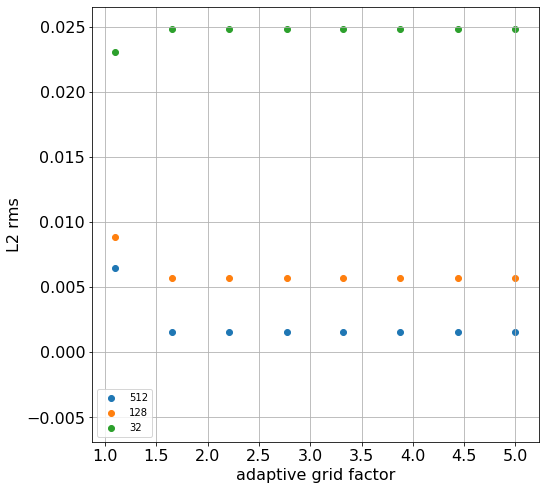

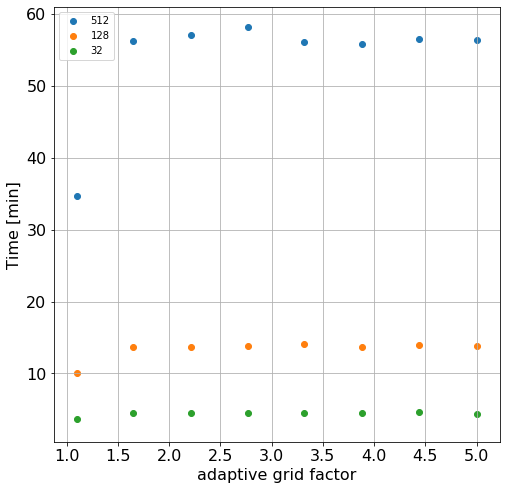

In [7]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_nstf = 5

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    d_agf = d_nstf[k_nstf]
    for k_agf in d_agf.keys():
        d_ANGULAR = d_agf[k_agf]
        if not bool(d_ANGULAR):
            continue
        d_data = d_ANGULAR[k_angular]
        


        x.append(k_agf)
    #             x.append(1e6*d_data['per_voxel_angle'])
    #             y.append(d_data['time']/60)
        y.append(d_data['error'])

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)
plt.legend()
# plt.yscale('log')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)


#--------------------------------------------------------

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_nstf = 5

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    d_agf = d_nstf[k_nstf]
    for k_agf in d_agf.keys():
        d_ANGULAR = d_agf[k_agf]
        if not bool(d_ANGULAR):
            continue
        d_data = d_ANGULAR[k_angular]
        


        x.append(k_agf)
    #             x.append(1e6*d_data['per_voxel_angle'])
        y.append(d_data['time']/60)

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("Time [min]", fontsize=16)
plt.legend()
# plt.yscale('log')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)

# Changing sh factor

<IPython.core.display.Javascript object>


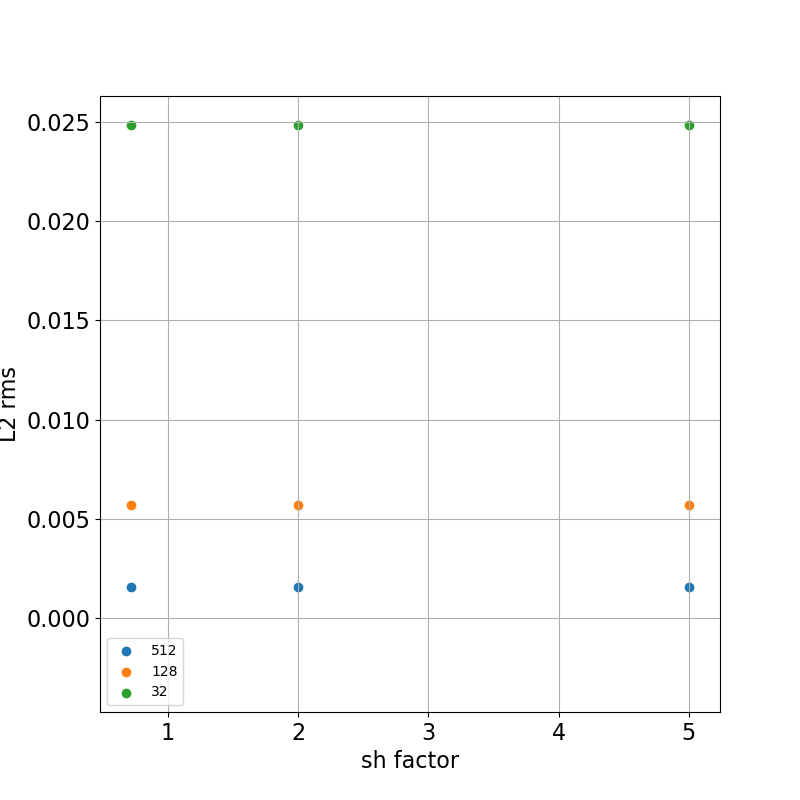

5
2
0.72
5
2
0.72
5
2
0.72


<IPython.core.display.Javascript object>


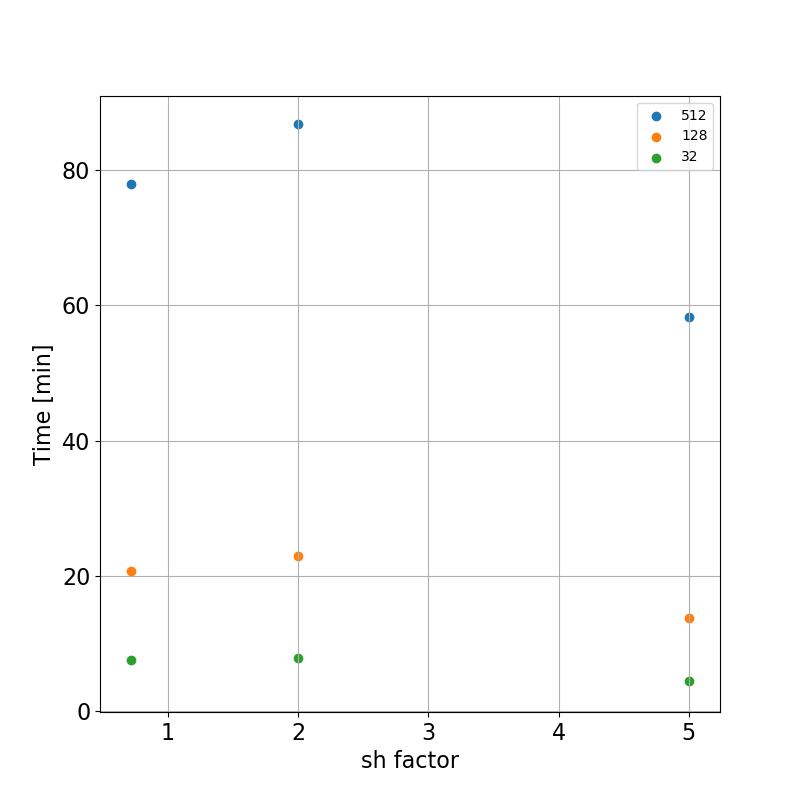

5
2
0.72
5
2
0.72
5
2
0.72


In [96]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_agf = 2.77

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    
    for k_nstf in d_nstf.keys():
        
        d_agf = d_nstf[k_nstf]
        d_ANGULAR = d_agf[k_agf]
        if not bool(d_ANGULAR):
            continue
        print(k_nstf)
        d_data = d_ANGULAR[k_angular]


        x.append(k_nstf)
    #             x.append(1e6*d_data['per_voxel_angle'])
    #             y.append(d_data['time']/60)
        y.append(d_data['error'])

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("sh factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)
plt.legend()
# plt.yscale('log')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)


# ------time---------------------------------

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_agf = 2.77

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    
    for k_nstf in d_nstf.keys():
        
        d_agf = d_nstf[k_nstf]
        d_ANGULAR = d_agf[k_agf]
        if not bool(d_ANGULAR):
            continue
        print(k_nstf)
        d_data = d_ANGULAR[k_angular]


        x.append(k_nstf)
    #             x.append(1e6*d_data['per_voxel_angle'])
        y.append(d_data['time']/60)

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("sh factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("Time [min]", fontsize=16)
plt.legend()
# plt.yscale('log')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)

# SHDOM TABLE

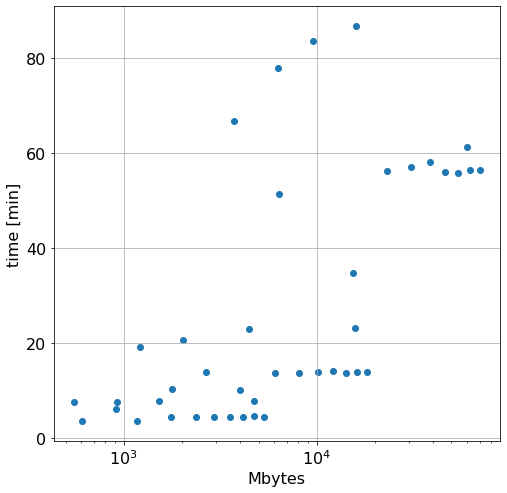

In [8]:
#  show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
x = []
y  = []
z = []

for k_angular in ANGULAR_RES:
    
    for k_nstf in d_nstf.keys():

        d_agf = d_nstf[k_nstf]
        for k_agf in d_agf.keys():
            d_ANGULAR = d_agf[k_agf]


            if(k_angular in d_ANGULAR.keys()):
                
                d_data = d_ANGULAR[k_angular]
#                 if(k_angular == 512):
#                     print(d_data['error'])
                    
#                 print(k_nstf,k_agf,k_angular,1e6*d_data['per_voxel_angle'],1e6*d_data['per_voxel'],d_data['time']/60)

                x.append(d_data['profile'])
                y.append(d_data['error'])
                z.append(d_data['time']/60)
        
plt.scatter(x, z)

# plt.yscale('log')    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
plt.xlabel("Mbytes", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
plt.ylabel("time [min]", fontsize=16)
# plt.ylabel("L2 rms", fontsize=16)
plt.xscale('log')

COLUMNS = ['Time [min]','Momory [MB]','Error']

shdom_time = np.array(z) # min
total_memory = np.array(x)
error = np.array(y)

# --pandas:
shdom_df = pd.DataFrame(data={'memory':np.array(total_memory),'time':np.array(shdom_time),'error':np.array(error)})
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.autoscale(enable=True, axis='y', tight=True)

In [29]:
shdom_data.T.shape

(42, 3)

# Create Tamars Table

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

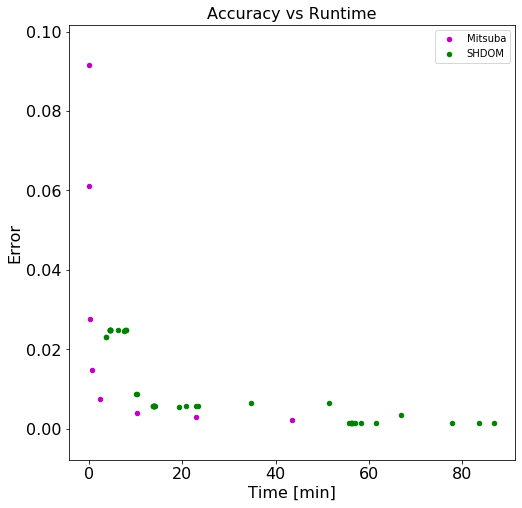

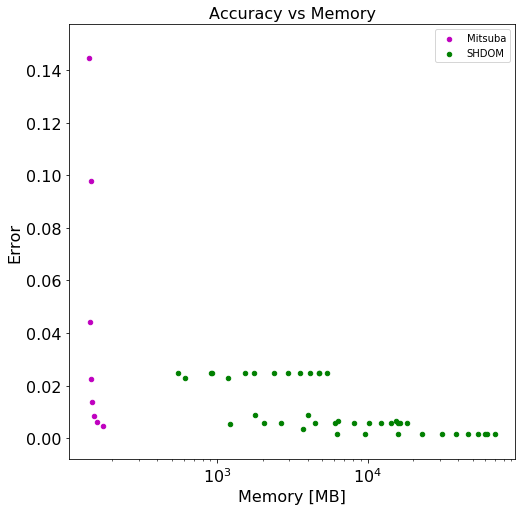

In [12]:
rrDdepth = 100
photons_per_pixel = [16384, 8192, 4096, 1024, 256, 64, 16, 8]
mitsuba_time = [43.567, 22.95, 10.1818, 2.3619, 0.566, 0.146, 0.0415,0.02] # min
total_memory = [173.8748723,158.5771971,153.1969536,147.4297856,146.1714944,145.3326336,144.4937728,142.082048]

error = [0.00230764, 0.00295436,0.00401274, 0.00753201, 0.01469951, 0.02768346, 0.06109001, 0.09155957]
# mitsuba_data_rrd100 = np.vstack((mitsuba_time,total_memory,error))
mitsuba_data_rrd100 = pd.DataFrame(data={'memory':np.array(total_memory),'time':np.array(mitsuba_time),'error':np.array(error)})

# -----------------
rrDdepth = 5
mitsuba_time = [34.25, 17.161, 9, 2, 0.5165, 0.1249, 0.0354, 0.0184] # min
total_memory = [173.0685174,160.0158433,152.7775232,147.5346432,146.0666368,143.7597696,144.9132032,140.9286144]

error = [0.00475904,0.00638401,0.00856691,0.01363147,0.02237326,0.04425151,0.09763128,0.14470996]
# mitsuba_data_rrd5 = np.vstack((mitsuba_time,total_memory,error))
mitsuba_data_rrd5 = pd.DataFrame(data={'memory':np.array(total_memory),'time':np.array(mitsuba_time),'error':np.array(error)})

# --pandas:
# accuracy vs runtime

ax1 = mitsuba_data_rrd100.plot(kind='scatter',x='time', y='error', color='r', label='Mitsuba',figsize=(8, 8))
shdom_df.plot(ax=ax1,kind='scatter',x='time', y='error', color='b', label='SHDOM')#kind='scatter',

ax1.set_xlabel("Time [min]", fontsize=16)
ax1.set_ylabel("Error", fontsize=16)
ax1.set_title("Accuracy vs Runtime", fontsize=16)

ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

# accuracy vs memory
mitsuba_df = pd.DataFrame(data={'memory':np.array(total_memory),'time':np.array(mitsuba_time),'error':np.array(error)})
ax1 = mitsuba_df.plot(kind='scatter',x='memory', y='error', color='r', label='Mitsuba',figsize=(8, 8))
shdom_df.plot(ax=ax1,kind='scatter',x='memory', y='error', color='b', label='SHDOM')#kind='scatter',

ax1.set_xlabel("Memory [MB]", fontsize=16)
ax1.set_ylabel("Error", fontsize=16)
ax1.set_title("Accuracy vs Memory", fontsize=16)
plt.xscale('log')

ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

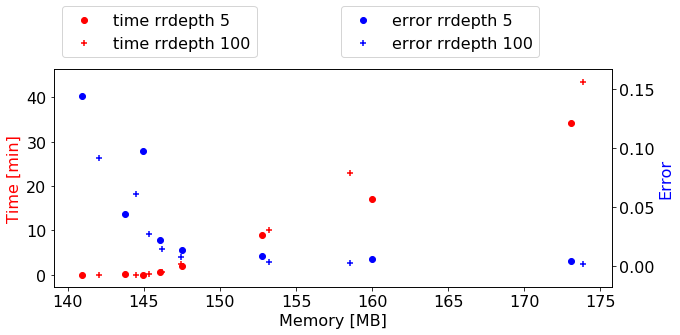

In [10]:
fig,ax = plt.subplots(figsize=(10,4))
M_time_5 = mitsuba_data_rrd5['time']
M_error_5 = mitsuba_data_rrd5['error']
M_memory_5 = mitsuba_data_rrd5['memory']

M_time_100 = mitsuba_data_rrd100['time']
M_error_100 = mitsuba_data_rrd100['error']
M_memory_100 = mitsuba_data_rrd100['memory']

ax.scatter(M_memory_5,M_time_5,marker='o',color='r', label='time rrdepth 5')
ax.scatter(M_memory_100,M_time_100,marker='+',color='r', label='time rrdepth 100')

ax.set_xlabel("Memory [MB]", fontsize=16)
ax.set_ylabel("Time [min]",color="red",fontsize=16)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.legend(bbox_to_anchor=(0,1.02,0.5,0.2), loc="lower left",prop={'size': 16})

ax2=ax.twinx()
ax2.scatter(M_memory_5, M_error_5,marker='o',color="b",label='error rrdepth 5')
ax2.scatter(M_memory_100, M_error_100,marker='+',color="b",label='error rrdepth 100')
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.legend(bbox_to_anchor=(0.5,1.02,1,0.2), loc="lower left",prop={'size': 16})

ax2.set_ylabel("Error",color="blue",fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
# plt.xscale('log')


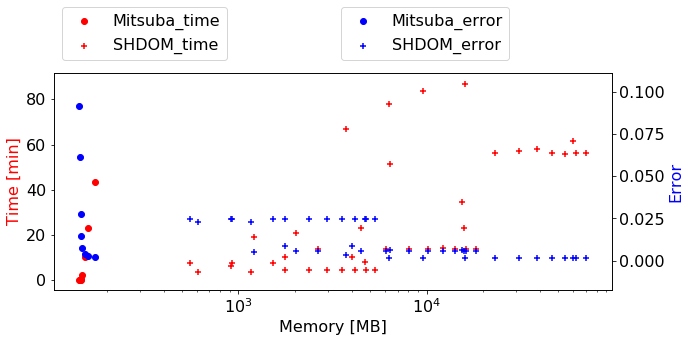

In [11]:
fig,ax = plt.subplots(figsize=(10,4))
M_time_ = mitsuba_data_rrd100['time']
M_error_ = mitsuba_data_rrd100['error']
M_memory_ = mitsuba_data_rrd100['memory']

S_time_ = shdom_df['time']
S_error_ = shdom_df['error']
S_memory_ = shdom_df['memory']

ax.scatter(M_memory_,M_time_,marker='o',color='r', label='Mitsuba_time')
ax.scatter(S_memory_,S_time_,marker='+',color='r', label='SHDOM_time')

ax.set_xlabel("Memory [MB]", fontsize=16)
ax.set_ylabel("Time [min]",color="red",fontsize=16)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.legend(bbox_to_anchor=(0,1.02,0.5,0.2), loc="lower left",prop={'size': 16})

ax2=ax.twinx()
ax2.scatter(M_memory_, M_error_,marker='o',color="b",label='Mitsuba_error')
ax2.scatter(S_memory_, S_error_,marker='+',color="b",label='SHDOM_error')
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.legend(bbox_to_anchor=(0.5,1.02,1,0.2), loc="lower left",prop={'size': 16})

ax2.set_ylabel("Error",color="blue",fontsize=16)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
plt.xscale('log')

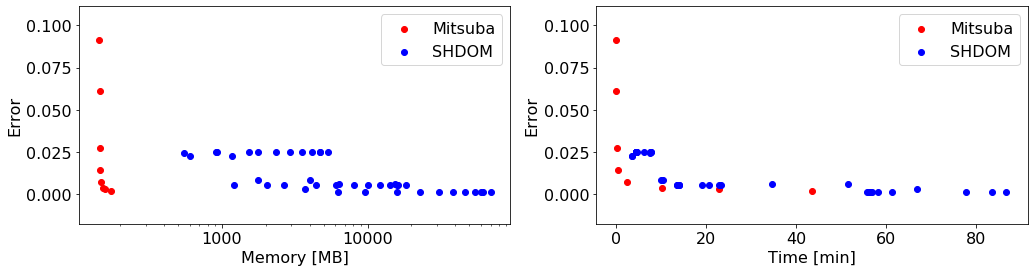

In [13]:
import matplotlib.ticker
fig,ax = plt.subplots(1,2,figsize=(17,4))
M_time_ = mitsuba_data_rrd100['time']
M_error_ = mitsuba_data_rrd100['error']
M_memory_ = mitsuba_data_rrd100['memory']

S_time_ = shdom_df['time']
S_error_ = shdom_df['error']
S_memory_ = shdom_df['memory']

ax[0].scatter(M_memory_,M_error_,marker='o',color='r', label='Mitsuba')
ax[0].scatter(S_memory_,S_error_,marker='o',color='b', label='SHDOM')

ax[0].set_ylabel("Error", fontsize=16)
ax[0].set_xlabel("Memory [MB]",fontsize=16)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[0].legend(prop={'size': 16})
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)
ax[0].set_xscale('log')
ax[0].set_xticks([1000,10000])
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2 = ax[1]
ax2.scatter(M_time_, M_error_,marker='o',color="r",label='Mitsuba')
ax2.scatter(S_time_, S_error_,marker='o',color="b",label='SHDOM')
# plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.legend(prop={'size': 16})

ax2.set_ylabel("Error",fontsize=16)
ax2.set_xlabel("Time [min]", fontsize=16)

ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)



fig.subplots_adjust(top=0.88)

In [35]:
total_memory

[173.9073782,
 159.5345469,
 152.9872384,
 147.0103552,
 145.752064,
 143.4451968,
 143.4451968,
 143.3403392]